In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc

rc('font',**{'family':'Times New Roman'})
rc('mathtext', fontset='dejavusans')

In [2]:
fid_reverse = [
36.26,
47.90,
59.67,
70.90,
81.53,
91.40,
101.03,
127.01,
196.29,
254.61,
307.60,
349.82,
381.36,
405.07,
422.27,
434.09,
441.22,
445.72,
448.46,
449.85,
450.61,
451.02,
451.42,
451.29,
451.33,
451.34,
451.54,
]

fid_forward = [
10.28,
26.03,
40.64,
53.44,
64.98,
75.88,
85.92,
113.66,
188.24,
249.48,
304.26,
347.64,
380.27,
404.47,
421.89,
433.47,
441.13,
445.86,
448.41,
449.86,
450.58,
450.92,
451.03,
451.41,
451.26,
451.20,
451.48,
]

In [3]:
timestep = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

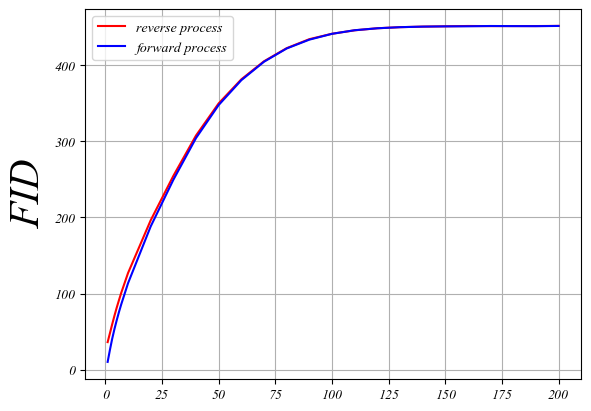

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_xticks = [0, 50, 100, 150, 200]
minor_xticks = [0, 25, 50, 75, 100, 125, 150, 175, 200]

major_yticks = [0, 100, 200, 300, 400]
minor_yticks = [0, 50, 100, 150, 200, 250, 300, 350, 400]
# ax.tick_params(axis='both', which='major', labelsize=30)
# ax.set_xticks(major_xticks)
# ax.set_xticks(minor_xticks, minor=True)
# ax.set_yticks(major_yticks)
# ax.set_yticks(minor_yticks, minor=True)
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 30,
        }
ax.set_ylabel("FID", fontdict=font)
ax.grid(which='both')
ax.plot(timestep, fid_reverse, color="red", label="reverse process")
ax.plot(timestep, fid_forward, color="blue", label="forward process")
ax.legend()

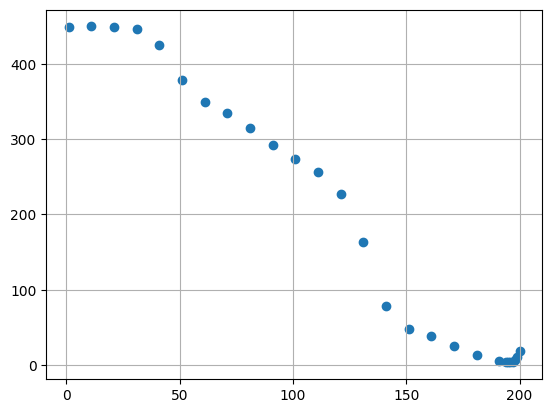

In [12]:
plt.scatter([201-i for i in timestep], fid)
plt.xticks([0, 50, 100, 150, 200])
plt.grid(which='both')

In [15]:
import numpy as np

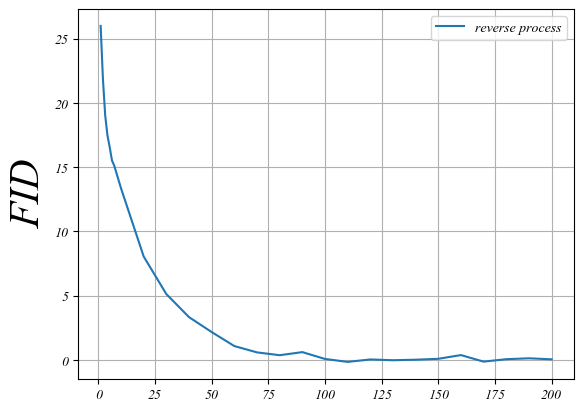

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_xticks = [0, 50, 100, 150, 200]
minor_xticks = [0, 25, 50, 75, 100, 125, 150, 175, 200]

major_yticks = [0, 100, 200, 300, 400]
minor_yticks = [0, 50, 100, 150, 200, 250, 300, 350, 400]
# ax.tick_params(axis='both', which='major', labelsize=30)
# ax.set_xticks(major_xticks)
# ax.set_xticks(minor_xticks, minor=True)
# ax.set_yticks(major_yticks)
# ax.set_yticks(minor_yticks, minor=True)
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 30,
        }
ax.set_ylabel("FID", fontdict=font)
ax.grid(which='both')
ax.plot(timestep, np.array(fid_reverse)-np.array(fid_forward), label="reverse process")
# ax.plot(timestep, fid_forward, color="blue", label="forward process")
ax.legend()